# Análisis DataSet Hamburguesas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib notebook
%matplotlib inline
plt.rcParams["figure.figsize"] = [8,8]
datos = pd.read_csv("Combo.csv")
datos.head()

,Carne,Salsa,Papas,Refresco
0,91.8712,5.83534,Medianas,Mediano
1,89.1723,5.59279,Grandes,Chico
2,88.2496,5.47612,Grandes,Grande
3,86.8345,5.25916,Grandes,Chico
4,88.8241,5.55034,Grandes,Chico


Construcción de la distribución de frecuencias

## Descripción de la variable carne

In [2]:
print("Sumatoria de la variable carne:",np.sum(datos.Carne))
print("Media de la variable carne:",datos.Carne.mean())
print("Mediana de la variable carne:",datos.Carne.median())
print("Desviación estandar de la variable carne:",np.std(datos.Carne))

Sumatoria de la variable carne: 45010.9035
Media de la variable carne: 90.02180699999997
Mediana de la variable carne: 90.02615
Desviación estandar de la variable carne: 2.040210248325157


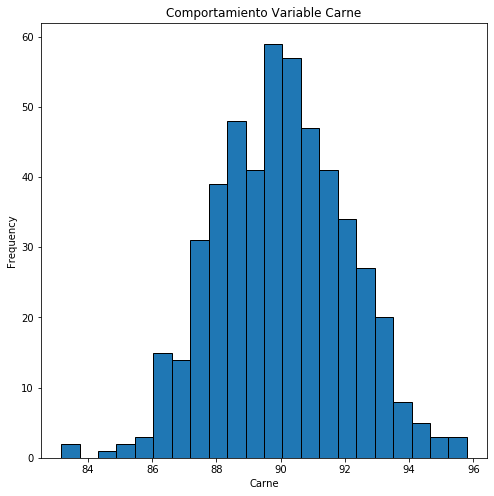

In [3]:
plt.title("Comportamiento Variable Carne")
plt.xlabel("Carne")
datos.Carne.plot.hist(edgecolor="black",bins=22)

A primera vista la distribución se ve simetrica con un valor de media $\bar{x}=90.022$, una variablidad o desviación estandar de $\sigma = 2.04$ y el dato central es $\tilde{x} = 90.02615$<br><br>
Hallaremos los cuartiles para apoyar la construcción del gráfico de caja.

In [4]:
datos.Carne.quantile([0.25,0.50,0.75])

0.25    88.59600
0.50    90.02615
0.75    91.36860
Name: Carne, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1476500ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f14765095d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f14763f0e90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1476500b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1476510550>],
 'means': []}

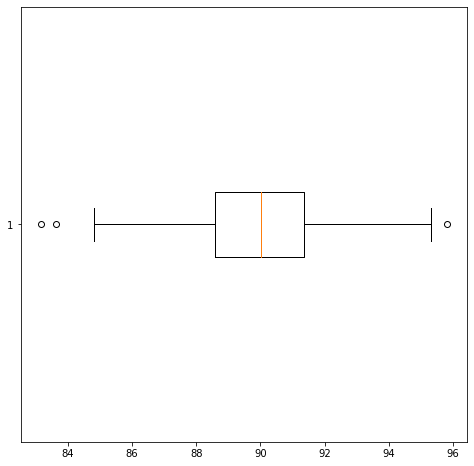

In [5]:
plt.boxplot(datos.Carne,vert=False)

<ul>
    <li>Distrbución de datos simetrica, sin embargo con el gráfico se puede inferir que los datos tienden a estar un poco más hacia la izquierda.</li> 
    <li>Dada la presencia de valores atipicos sería más conveniente tener de referencía el valor de la mediana que de la media sin embargo en este caso son valores muy cercanos.</li>
</ul>

## Descripción de la variable Salsa

In [6]:
print("Sumatoria de la variable salsa:",np.sum(datos.Salsa))
print("Media de la variable salsa:",datos.Salsa.mean())
print("Mediana de la variable salsa:",datos.Salsa.median())
print("Desviación estandar de la variable salsa:",np.std(datos.Salsa))

Sumatoria de la variable salsa: 2804.05502
Media de la variable salsa: 5.608110040000003
Mediana de la variable salsa: 5.60025
Desviación estandar de la variable salsa: 0.23403226390307455


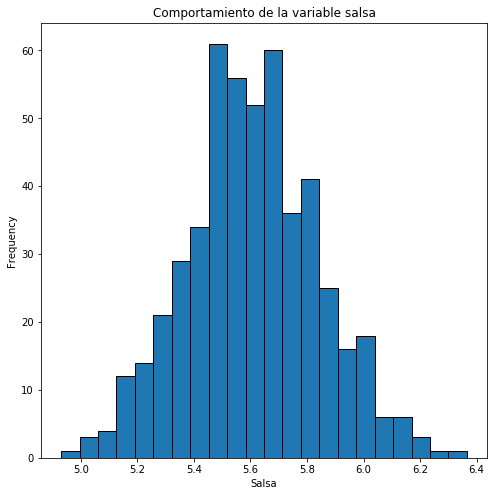

In [7]:
plt.title("Comportamiento de la variable salsa")
plt.xlabel("Salsa")
datos.Salsa.plot.hist(edgecolor="black",bins=22)

Aunque no se refleja de la misma claridad que con la variable "Carne" es posible afirmar que la distribución es simetrica y su tendencia es a la derecha.

In [8]:
datos.Salsa.quantile([0.25,0.50,0.75])

0.25    5.46569
0.50    5.60025
0.75    5.76792
Name: Salsa, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f14764180d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1476429790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f14764240d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1476429d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1476431710>],
 'means': []}

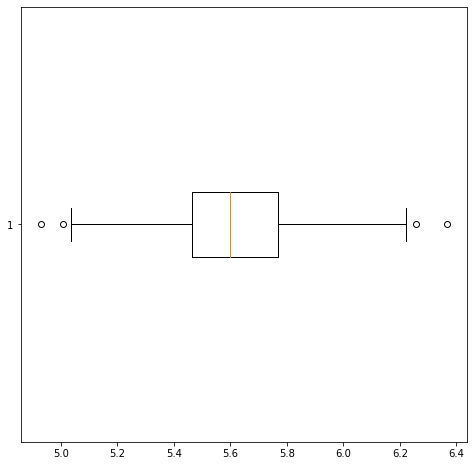

In [9]:
plt.boxplot(datos.Salsa, vert=False)

<ul>
    <li>El gráfico de caja presenta algunos valores atipicos que pueden afectar en gran medida el valor de la media. Por tanto al igual que con la variable "Carne" Sería más conveniente tener de referencia la mediana</li>
    <li>Se puede notar que aunque la distribución tiende a ser simetrica se puede notar que los datos tiende a estar un poco más hacia la derecha.</li>
</ul>

## Análisis de las variables Salsa y Carne 

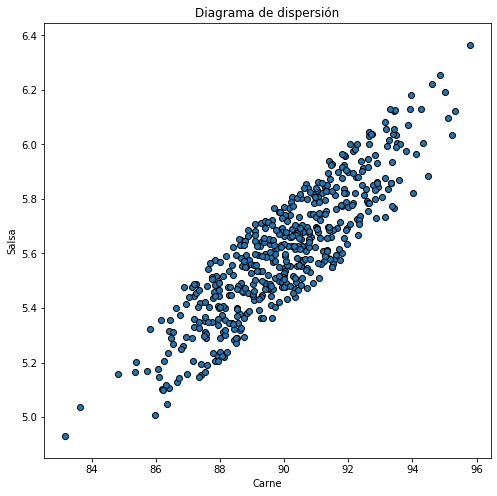

In [10]:
plt.xlabel("Carne")
plt.ylabel("Salsa")
plt.title("Diagrama de dispersión")
plt.scatter(datos.Carne,datos.Salsa,edgecolor="black")

En el diagrama de dispersión se puede observar que las variables "Salsa" y "Carne" tienen un comportamiento lineal, a medida que una variable crece la otra también, podemos hacer un modelo de regresión que describa este comportamiento. 

In [11]:
regresion = pd.DataFrame()
regresion["x"] = datos.Carne.to_numpy()
regresion["y"] = datos.Salsa.to_numpy()
regresion["xy"] = regresion.x * regresion.y
regresion["x_cuadrado"] = pow(regresion.x,2)
regresion["y_cuadrado"] = pow(regresion.y,2)
suma_x = np.sum(regresion.x)
suma_y = np.sum(regresion.y)
suma_xy = np.sum(regresion.xy)
suma_x_cuadrado = np.sum(regresion.x_cuadrado)
suma_y_cuadrado = np.sum(regresion.y_cuadrado)
print(suma_x, suma_y, suma_xy, suma_x_cuadrado, suma_y_cuadrado)

45010.9035 2804.05502 252636.589513499 4054044.0967013105 15752.8346606482


$$2804.05502 = 500*a + 45010.9035*b$$
$$252636 = 45010.9035*a + 4054044.0967*b$$
<br>
$$a = -3.49$$
$$b = 0.10114$$
<br>
$$Salsa = 0.1011*Carne - 3.49$$

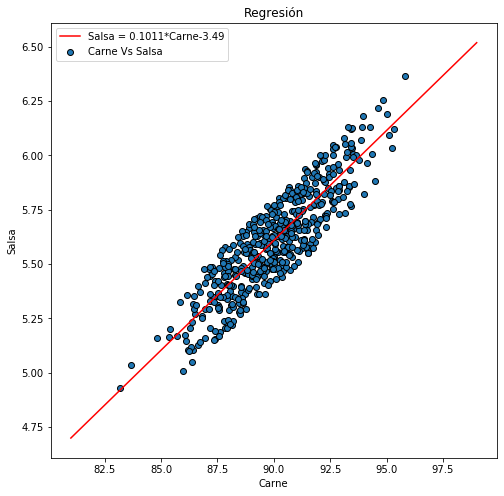

In [12]:
plt.title("Regresión")
plt.xlabel("Carne")
plt.ylabel("Salsa")
plt.scatter(datos.Carne,datos.Salsa, edgecolor="black",label="Carne Vs Salsa")
carne = [i for i in range(81,100)]
salsa = [0.1011*valor-3.49 for valor in carne]
plt.plot(carne,salsa,label="Salsa = 0.1011*Carne-3.49",color="red")
plt.legend()

Al calcular el coeficiente de correlación obtenemos un valor de $r=0.8815$ por tanto podemos decir que la recta se ajusta de buena manera a los datos

In [13]:
datos.Papas.value_counts()

Medianas    247
Grandes     166
Chicas       87
Name: Papas, dtype: int64

In [14]:
datos.Refresco.value_counts()

Mediano    250
Chico      167
Grande      83
Name: Refresco, dtype: int64

In [15]:
datos.groupby("Papas").Refresco.value_counts()

Papas     Refresco
Chicas    Mediano      36
          Chico        35
          Grande       16
Grandes   Mediano      80
          Chico        54
          Grande       32
Medianas  Mediano     134
          Chico        78
          Grande       35
Name: Refresco, dtype: int64

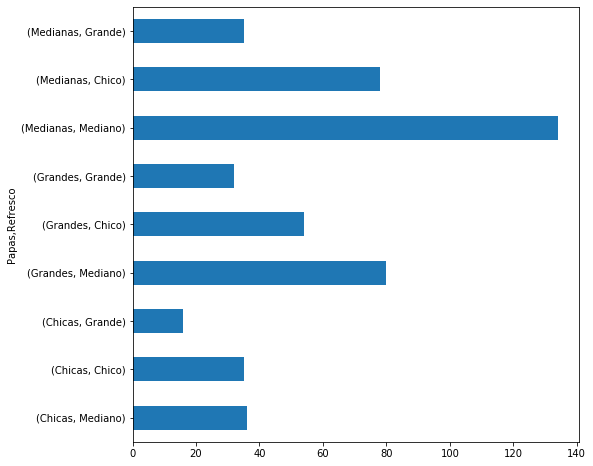

In [16]:
datos.groupby("Papas").Refresco.value_counts().plot.barh()

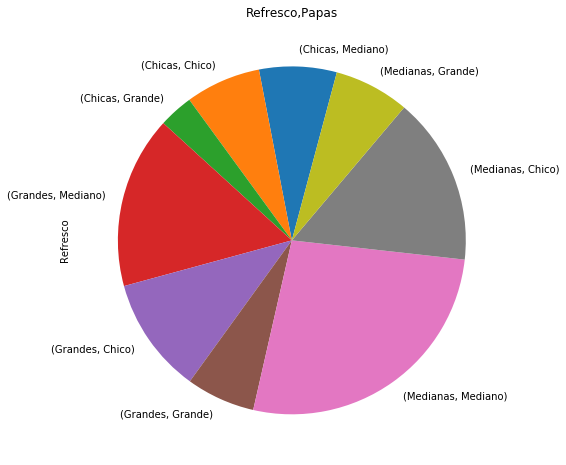

In [17]:
plt.title("Refresco,Papas")
datos.groupby("Papas").Refresco.value_counts().plot.pie(startangle=75)

In [18]:
print(max(datos.Carne), min(datos.Carne), max(datos.Carne)-min(datos.Carne), math.sqrt(500))

95.7986 83.1616 12.636999999999986 22.360679774997898


In [19]:
print(max(datos.Salsa), min(datos.Salsa), max(datos.Salsa)-min(datos.Salsa), math.sqrt(500))

6.36586 4.92999 1.4358699999999995 22.360679774997898
